# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df =pd.read_csv(WHRDataSet_filename) # YOUR CODE HERE

df.head(50)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


In [3]:
df.shape


(1562, 19)

In [4]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
print(df[df['country'] == 'Albania'])


['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']
    country  year  Life Ladder  Log GDP per capita  Social support  \
10  Albania  2007     4.634252            9.077325        0.821372   
11  Albania  2009     5.485470            9.161633        0.833047   
12  Albania  2010     5.268937            9.203026        0.733152   
13  Albania  2011     5.867422            9.230898        0.759434   
14  Albania  2012     5.510124            9.246649        0.784502   
15  Albania  2013     4.550

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>  
For my problem I chose the World Happiness Raport dataset. 
I will predict the future life ladder of the countries in the dataset. The label I will use is Future Life Ladder. 
This problem is a supervised regression problem. 
The key features i will focus on will be gpd per capita, social support, freedom to make life choices, generosity, perception of corruption.
Predicting the future life ladder of countries will help us detect which countries need more help and work to make their citizens have a happy life. For a company it can be helpful to know the countries with higher and lower happiness as it can be a way to detect in which countries it will be easier to work on.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [6]:
#data prep
features = ['Log GDP per capita', 'Freedom to make life choices', 'Democratic Quality', "Generosity",
            "Perceptions of corruption", "Negative affect", "Social support", 
            "Healthy life expectancy at birth" , "Positive affect"]

df = df.dropna(subset=['Life Ladder'])
fr = [f for f in features if f not in ['Country', 'year', 'Life Ladder']]
df[fr] = df[fr].fillna(df[fr].median())
df.head(50)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,-0.225939,NaN,1.454051,0.546283,NaN,NaN,0.286599


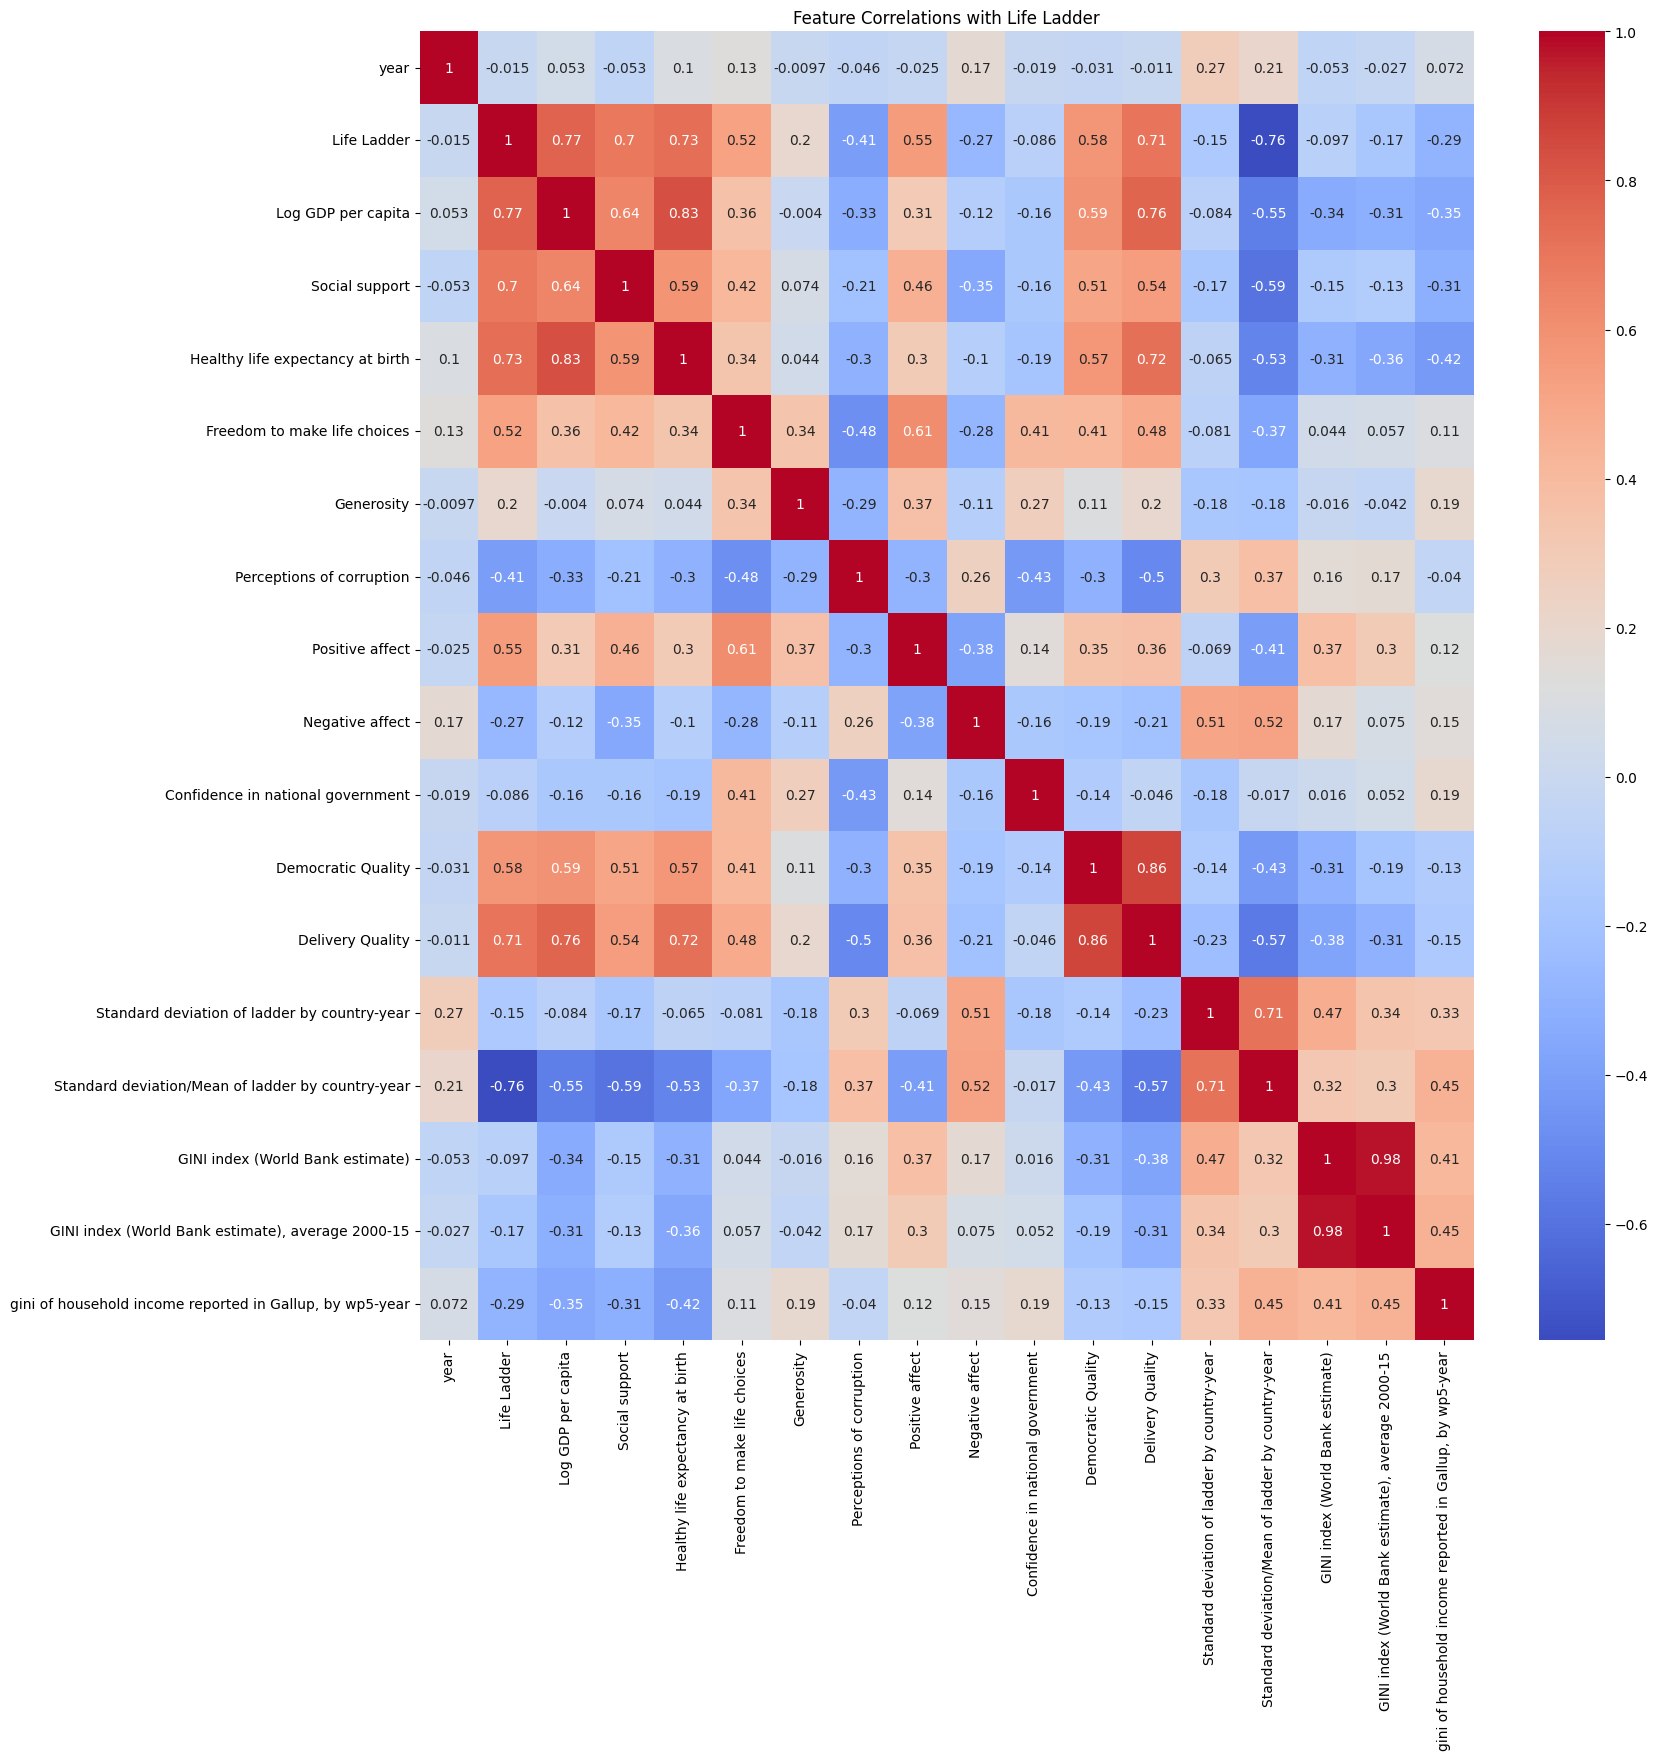

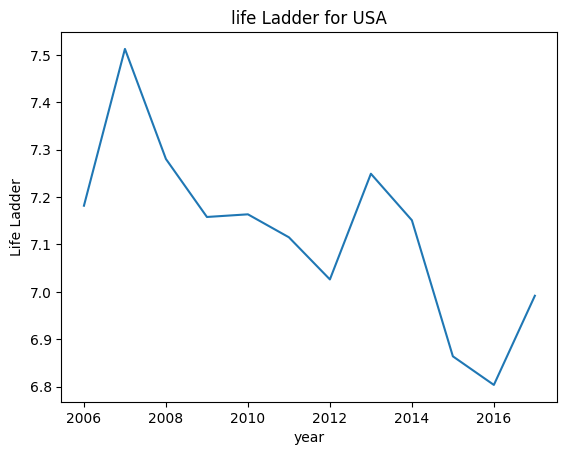

In [7]:
# YOUR CODE HERE
plt.figure(figsize=(17, 17))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations with Life Ladder")
plt.show()



sns.lineplot(data=df[df['country'] == 'United States'], x='year', y='Life Ladder')
plt.title("life Ladder for USA")
plt.show()

In [8]:
print(df[df['year'] == 2017]) 

          country  year  Life Ladder  Log GDP per capita  Social support  \
9     Afghanistan  2017     2.661718            7.460144        0.490880   
19        Albania  2017     4.639548            9.373718        0.637698   
25        Algeria  2017     5.248912            9.540244        0.806754   
41      Argentina  2017     6.039330            9.843519        0.906699   
53        Armenia  2017     4.287736            9.034711        0.697925   
...           ...   ...          ...                 ...             ...   
1505   Uzbekistan  2017     6.421448            8.762778        0.942131   
1528      Vietnam  2017     5.175279            8.742655        0.833047   
1538        Yemen  2017     3.253560            9.398610        0.789555   
1549       Zambia  2017     3.932777            8.211670        0.743754   
1561     Zimbabwe  2017     3.638300            7.538187        0.754147   

      Healthy life expectancy at birth  Freedom to make life choices  \
9              

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>
After I inspected the data and correlations, I decided to keep the most correlating features like log gdp per capita, social support,Healthy life expectancy at birth, Freedom to make life choices and democratic quality.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [9]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [11]:
# YOUR CODE HERE
features = ['Log GDP per capita', 'Freedom to make life choices', "Generosity",
            "Perceptions of corruption", "Negative affect", "Social support", "Healthy life expectancy at birth" ,
            'Democratic Quality', "Positive affect"]
target = 'Life Ladder'

df = df.dropna(subset=features + [target])
df = df.sort_values(['country', 'year'])

train_df = df[df['year'] <= 2016]
X_train = train_df[features]
y_train = train_df[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

#---1

latest_features_df = df[df['year'] == 2017][['country'] + features].dropna()

X_future_scaled = scaler.transform(latest_features_df[features])
future_predictions = rf.predict(X_future_scaled)
latest_features_df['Predicted Life Ladder (+1)'] = future_predictions

#------2
train_df = df[df['year'] <= 2017]
X_train = train_df[features]
y_train = train_df[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

second_year_input = latest_features_df.copy()
second_year_input['year'] = 2018 
second_year_input['Life Ladder'] = second_year_input['Predicted Life Ladder (+1)']


X2_scaled = scaler.transform(second_year_input[features])
second_prediction = rf.predict(X2_scaled)
latest_features_df['Predicted Life Ladder (+2)'] = second_prediction



print(latest_features_df[['country', 'Predicted Life Ladder (+1)', 
                          'Predicted Life Ladder (+2)']].sort_values(by='Predicted Life Ladder (+2)').head(15))

y_train_pred = rf.predict(X_train_scaled)

mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)


                       country  Predicted Life Ladder (+1)  \
9                  Afghanistan                    3.271163   
1281               South Sudan                    4.655004   
851                     Malawi                    3.868145   
252   Central African Republic                    4.744747   
1538                     Yemen                    4.581825   
1371                  Tanzania                    4.255854   
1561                  Zimbabwe                    4.111578   
550                      Haiti                    4.212922   
841                 Madagascar                    3.760336   
176                   Botswana                    4.837902   
1436                    Uganda                    4.083474   
415                      Egypt                    4.397331   
444                   Ethiopia                    4.003573   
1216              Sierra Leone                    4.161779   
1549                    Zambia                    4.587646   

      P

In [12]:
mse

0.021193487553499694

In [13]:
r2

0.9831245097424253

In [15]:

def country_report(country_name):
    historical = df[df['country'] == country_name][['year', 'Life Ladder']]
    preds = latest_features_df[latest_features_df['country'] == country_name]
    
    if len(historical) == 0:
        print(f"No data found for {country_name} or country does not exist")
        return
    
    print(f"\nLife Ladder for {country_name}:")
    print("Historical Data:")
    print(historical.to_string(index=False))
    
    if len(preds) > 0:
        print("\nFuture Life Ladder")
        print(f"2018: {preds['Predicted Life Ladder (+1)'].values[0]:.3f}")
        print(f"2019: {preds['Predicted Life Ladder (+2)'].values[0]:.3f}")
    else:
        print("\nNo predictions available (missing 2017 data)")

while True:
    print("\nFuture Life Ladder")
    user_input = input("\nEnter a country name (or 'quit'): ").strip()
    
    if user_input.lower() == 'quit':
        break
        
    country_report(user_input)
    
    #_wrong country name
    if user_input not in df['country'].unique():
        print("\nCountry not found? (Country examples)")
        print(df['country'].unique()[:100])


Future Life Ladder



Enter a country name (or 'quit'):  Albania



Life Ladder for Albania:
Historical Data:
 year  Life Ladder
 2007     4.634252
 2009     5.485470
 2010     5.268937
 2011     5.867422
 2012     5.510124
 2013     4.550648
 2014     4.813763
 2015     4.606651
 2016     4.511101
 2017     4.639548

Future Life Ladder
2018: 4.747
2019: 4.698

Future Life Ladder



Enter a country name (or 'quit'):  quit
